<a href="https://colab.research.google.com/github/y05f/AI-Machine-Learning-et-Deep-Learning/blob/main/Cats_v_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile, rmtree

In [ ]:
#rmtree('/tmp/cats-v-dogs')


In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2021-04-22 12:17:15--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 92.123.124.137, 2a02:26f0:e3:39c::e59, 2a02:26f0:e3:3af::e59
Connecting to download.microsoft.com (download.microsoft.com)|92.123.124.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   116MB/s    in 7.5s    

2021-04-22 12:17:22 (105 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))
print(os.listdir('/tmp'))
print(os.listdir('/tmp'))

# 12501
# 12501

12501
12501
['PetImages', 'initgoogle_syslog_dir.0', 'debugger_231tvofjw9', 'dap_multiplexer.INFO', 'cats-and-dogs.zip', 'dap_multiplexer.e7e162e8e12b.root.log.INFO.20210422-120825.48', 'MSR-LA - 3467.docx', 'readme[1].txt']
['PetImages', 'initgoogle_syslog_dir.0', 'debugger_231tvofjw9', 'dap_multiplexer.INFO', 'cats-and-dogs.zip', 'dap_multiplexer.e7e162e8e12b.root.log.INFO.20210422-120825.48', 'MSR-LA - 3467.docx', 'readme[1].txt']


In [ ]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files_list = os.listdir(SOURCE)
  files_list = random.sample(files_list, len(files_list))
  for i in range(len(files_list)):
    if os.path.getsize(os.path.join(SOURCE,files_list[i])) == 0 :
      print(files_list[i],"is zero length, so ignoring")
    else:
      if i <= len(files_list) * 0.9 :
        copyfile(os.path.join(SOURCE,files_list[i]),os.path.join(TRAINING,files_list[i]))
      else :
        copyfile(os.path.join(SOURCE,files_list[i]),os.path.join(TESTING,files_list[i]))


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


# Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
TRAINING_DIR = "/tmp/cats-v-dogs/training"
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

VALIDATION_DIR = "/tmp/cats-v-dogs/testing"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)



Epoch 1/15
 116/1125 [==>...........................] - ETA: 2:58 - loss: 0.7162 - accuracy: 0.5230

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

1125/1125 [==============================] - 241s 187ms/step - loss: 0.6921 - accuracy: 0.5320 - val_loss: 0.6438 - val_accuracy: 0.6275
Epoch 2/15
1125/1125 [==============================] - 208s 185ms/step - loss: 0.6355 - accuracy: 0.6342 - val_loss: 0.6017 - val_accuracy: 0.6683
Epoch 3/15
1125/1125 [==============================] - 210s 187ms/step - loss: 0.6010 - accuracy: 0.6724 - val_loss: 0.6171 - val_accuracy: 0.6471
Epoch 4/15
1125/1125 [==============================] - 212s 188ms/step - loss: 0.5865 - accuracy: 0.6877 - val_loss: 0.6446 - val_accuracy: 0.6415
Epoch 5/15
1125/1125 [==============================] - 209s 186ms/step - loss: 0.5681 - accuracy: 0.7044 - val_loss: 0.5744 - val_accuracy: 0.6951
Epoch 6/15
1125/1125 [==============================] - 206s 183ms/step - loss: 0.5567 - accuracy: 0.7158 - val_loss: 0.5676 - val_accuracy: 0.7003
Epoch 7/15
1125/1125 [==============================] - 205s 183ms/step - loss: 0.5375 - accuracy: 0.7258 - val_loss: 0.571

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#model.save_weights("/content/gdrive/MyDrive/catVdogs-Weights2")
model.load_weights("/content/gdrive/MyDrive/catVdogs-Weights")


Mounted at /content/gdrive


In [ ]:
model.save("/content/gdrive/MyDrive/catsVdogsModel1.h5")

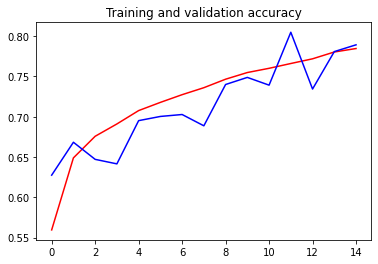

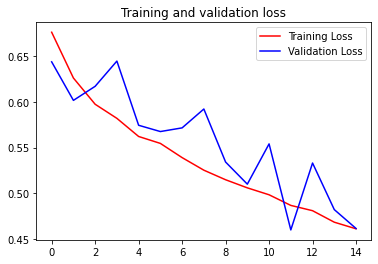

In [ ]:

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend()

plt.title('Training and validation loss')
plt.show()



# Test

In [ ]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if classes[0]>0.5:
    print(fn + " is a dog, (output: "+str(classes[0])+")")
  else:
    print(fn + " is a cat, (output:" +str(classes[0])+")")

Saving cat1.png to cat1.png
Saving cat2.jpg to cat2.jpg
Saving cat3.jpg to cat3.jpg
Saving cat4.png to cat4.png
Saving dog1.jpg to dog1.jpg
Saving dog2.jpg to dog2.jpg
Saving dog3.jpg to dog3.jpg
cat1.png is a dog, (output: [1.])
cat2.jpg is a cat, (output:[4.018329e-07])
cat3.jpg is a cat, (output:[0.00194223])
cat4.png is a cat, (output:[0.])
dog1.jpg is a dog, (output: [1.])
dog2.jpg is a dog, (output: [1.])
dog3.jpg is a dog, (output: [1.])
